In [ ]:
%pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 116.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 99.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
%pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 21.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.


In [ ]:
from datasets import load_dataset

# Load dataset from Hugging Face
dataset = load_dataset("go_emotions", split="train")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.40k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/2.77M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/350k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/347k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/43410 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5426 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5427 [00:00<?, ? examples/s]

In [ ]:
len(dataset)

43410

In [ ]:
import random
from collections import defaultdict

# Define emotion opposites (This can be refined based on psychological research)
opposite_emotions = {
    "admiration": ["disgust", "disapproval"],
    "amusement": ["anger", "disappointment"],
    "anger": ["amusement", "love"],
    "annoyance": ["relief", "love"],
    "approval": ["disapproval", "disgust"],
    "caring": ["apathy", "disgust"],
    "confusion": ["realization", "pride"],
    "curiosity": ["apathy", "fear"],
    "desire": ["remorse", "disgust"],
    "disappointment": ["joy", "relief"],
    "disapproval": ["approval", "admiration"],
    "disgust": ["admiration", "love"],
    "embarrassment": ["pride", "confidence"],
    "excitement": ["boredom", "sadness"],
    "fear": ["confidence", "optimism"],
    "gratitude": ["indifference", "annoyance"],
    "grief": ["relief", "joy"],
    "joy": ["sadness", "disappointment"],
    "love": ["disgust", "anger"],
    "nervousness": ["confidence", "calmness"],
    "optimism": ["pessimism", "fear"],
    "pride": ["shame", "embarrassment"],
    "realization": ["confusion", "denial"],
    "relief": ["anxiety", "nervousness"],
    "remorse": ["pride", "joy"],
    "sadness": ["joy", "excitement"],
    "surprise": ["expectation", "boredom"]
}

def generate_triplets(dataset, num_triplets=5000):
    triplets = []
    label_to_sentences = defaultdict(set)

    # Map labels to text for quick access
    for entry in dataset:
        for label in entry['labels']:
            label_to_sentences[label].add(entry['text'])

    dataset_texts = set(entry['text'] for entry in dataset)

    retries = 0  # Track failures

    while len(triplets) < num_triplets and retries < num_triplets * 2:
        anchor = random.choice(dataset)
        anchor_text = anchor['text']
        anchor_labels = anchor['labels']

        # Positive selection: Any text with the same label(s) (excluding the anchor itself)
        positive_candidates = set()
        for label in anchor_labels:
            positive_candidates.update(label_to_sentences[label])
        positive_candidates.discard(anchor_text)

        # Negative selection: Any text with different labels
        all_labels = set(label_to_sentences.keys())
        negative_labels = all_labels - set(anchor_labels)

        negative_candidates = set()
        for label in negative_labels:
            negative_candidates.update(label_to_sentences[label])

        # Remove anchor and positives from negatives
        negative_candidates -= {anchor_text}
        negative_candidates -= positive_candidates

        # Convert sets to lists before sampling
        positive_candidates = list(positive_candidates)
        negative_candidates = list(negative_candidates)

        if positive_candidates and negative_candidates:
            positive = random.choice(positive_candidates)
            negative = random.choice(negative_candidates)
            triplets.append((anchor_text, positive, negative))
        else:
            retries += 1

    print(f"Generated {len(triplets)} triplets after {retries} retries.")
    return triplets


# Generate triplets
triplets = generate_triplets(dataset, num_triplets=43410)


Generated 43410 triplets after 0 retries.


In [ ]:

# Mapping label indices to emotion names
emotion_labels = [
    "admiration", "amusement", "anger", "annoyance", "approval", "caring", "confusion",
    "curiosity", "desire", "disappointment", "disapproval", "disgust", "embarrassment",
    "excitement", "fear", "gratitude", "grief", "joy", "love", "nervousness",
    "optimism", "pride", "realization", "relief", "remorse", "sadness", "surprise"
]

import random
from collections import defaultdict

def generate_triplets(dataset, num_triplets=5000):
    triplets = []

    # Map labels to sentences for fast lookup
    label_to_sentences = defaultdict(set)
    for entry in dataset:
        for label in entry['labels']:
            label_to_sentences[label].add(entry['text'])

    dataset_texts = set(entry['text'] for entry in dataset)  # Store all text samples for quick access

    for _ in range(num_triplets):
        anchor = random.choice(dataset)  # Pick a random sentence
        anchor_text = anchor['text']
        anchor_labels = anchor['labels']

        # Get positive candidates (same label but different sentence)
        positive_candidates = set()
        for label in anchor_labels:
            positive_candidates.update(label_to_sentences[label])
        positive_candidates.discard(anchor_text)  # Remove anchor itself

        # Get negative candidates (sentences with NO shared labels)
        negative_candidates = dataset_texts - positive_candidates - {anchor_text}

        # Convert sets to lists before sampling
        positive_candidates = list(positive_candidates)
        negative_candidates = list(negative_candidates)

        # Ensure both sets are non-empty before sampling
        if positive_candidates and negative_candidates:
            positive = random.choice(positive_candidates)
            negative = random.choice(negative_candidates)
            triplets.append((anchor_text, positive, negative))

    return triplets


triplets = generate_triplets(dataset, num_triplets = 43410)


In [ ]:
import torch
from sentence_transformers import SentenceTransformer, InputExample, losses
from torch.utils.data import DataLoader

# Check if GPU is available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Load the SentenceTransformer model and move it to GPU
model = SentenceTransformer('all-mpnet-base-v2', device=device)

# Assuming 'triplets' is already created (list of tuples: (anchor, positive, negative))
train_examples = [InputExample(texts=[a, p, n], label=i) for i, (a, p, n) in enumerate(triplets)]

# DataLoader for batching
train_dataloader = DataLoader(train_examples, shuffle=True, batch_size=32)  # Adjust batch_size as needed
train_loss = losses.BatchHardTripletLoss(model, margin=0.3)  # Reduce margin for fine-tuning

# Fine-tune the model
model.fit(
    train_objectives=[(train_dataloader, train_loss)],
    epochs=5,  # Adjust as needed
    warmup_steps=100,
    show_progress_bar=True
)


Using device: cuda


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Computing widget examples:   0%|          | 0/1 [00:00<?, ?example/s]

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: aaryanisc00l123 (aaryanisc00l123-chandigarh-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
500,0.000000
1000,0.000000
1500,0.000000
2000,0.000000
2500,0.000000
3000,0.000000
3500,0.000000
4000,0.000000
4500,0.000000
5000,0.000000


KeyboardInterrupt: 

In [ ]:
model.save("emotion_embedding_model")


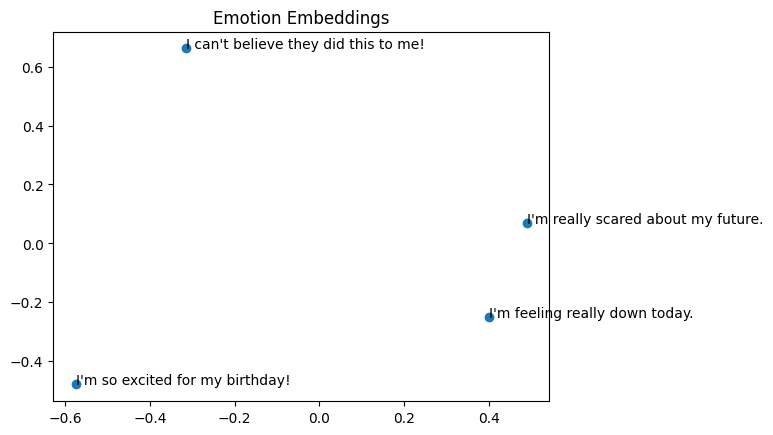

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Sample emotion sentences
test_sentences = [
    "I'm so excited for my birthday!",  # Joy
    "I'm feeling really down today.",  # Sadness
    "I can't believe they did this to me!",  # Anger
    "I'm really scared about my future.",  # Fear
]

# Convert sentences to embeddings
embeddings = model.encode(test_sentences)

# Reduce dimensions using PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Plot embeddings
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])
for i, text in enumerate(test_sentences):
    plt.annotate(text, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))
plt.title("Emotion Embeddings")
plt.show()

In [ ]:
dataset_embeddings = model.encode([d['text'] for d in dataset])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# User input
user_emotion = "I feel like i am about to kill myself and my girlfrield has cheated on me."

# Encode user input
user_embedding = model.encode([user_emotion])

# Compare with dataset
similarities = cosine_similarity(user_embedding, dataset_embeddings)[0]

# Find top 3 most similar sentences
top_indices = np.argsort(similarities)[-5:]
print("Most similar emotional texts:")
for idx in top_indices:
    print(dataset[int(idx)]['text'])


Most similar emotional texts:
I'm good. Happy with my boyfriend.
But you’re so so loved! Please find some to talk to! I hope you can overcome this sad part of life.
Hugs to you It will get better
I’m sorry you are feeling so down friend, that is really difficult. I hope find a way to feel better.. maybe go to emergency care...
Find yourself another pretty, nice girl that doesn’t have cheating tendencies. They exist 


In [ ]:
from sentence_transformers import SentenceTransformer, util


# Sample test sentences
sentence1 = "I am feeling extremely happy today!"
sentence2 = "This is the best day of my life!"
sentence3 = "I am so sad and heartbroken."

# Generate embeddings
embedding1 = model.encode(sentence1, convert_to_tensor=True)
embedding2 = model.encode(sentence2, convert_to_tensor=True)
embedding3 = model.encode(sentence3, convert_to_tensor=True)

# Compute cosine similarity
similarity_1_2 = util.pytorch_cos_sim(embedding1, embedding2).item()
similarity_1_3 = util.pytorch_cos_sim(embedding1, embedding3).item()

print(f"Similarity between happy sentences: {similarity_1_2:.4f}")  # Should be high
print(f"Similarity between happy and sad sentence: {similarity_1_3:.4f}")  # Should be low


Similarity between happy sentences: 0.5530
Similarity between happy and sad sentence: 0.3219


In [ ]:
import numpy as np

# Example test dataset
emotion_sentences = [
    "I am so excited and thrilled!",
    "I feel deeply grateful and blessed.",
    "I am anxious and nervous about the test.",
    "I feel heartbroken and devastated.",
    "I am furious and outraged at this!"
]

# Encode all sentences
embeddings = model.encode(emotion_sentences)

# Compute similarity matrix
similarity_matrix = util.pytorch_cos_sim(embeddings, embeddings)

# Print similarity scores
print("Similarity Matrix:\n", similarity_matrix.numpy())


Similarity Matrix:
 [[1.         0.3995393  0.24595174 0.36535594 0.4306137 ]
 [0.3995393  1.0000001  0.21743093 0.665679   0.3873569 ]
 [0.24595174 0.21743093 1.0000001  0.23440026 0.14409503]
 [0.36535594 0.665679   0.23440026 1.         0.4228742 ]
 [0.4306137  0.3873569  0.14409503 0.4228742  1.0000001 ]]


IndexError: index 3 is out of bounds for axis 0 with size 3

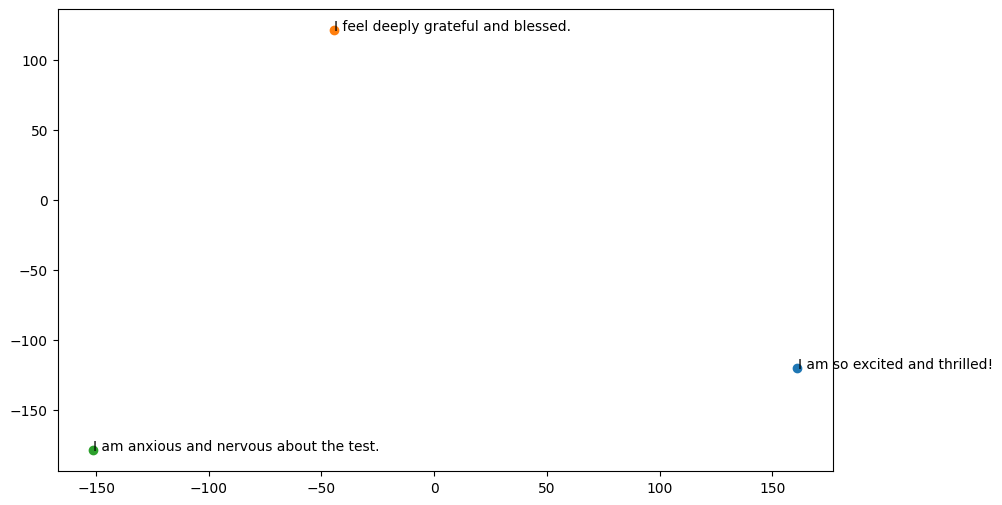

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Reduce dimensions to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity = 2)
sentences = [sentence1, sentence2, sentence3]
embeddings = model.encode(sentences)
reduced_embeddings = tsne.fit_transform(embeddings)

# Plot
plt.figure(figsize=(10, 6))
for i, text in enumerate(emotion_sentences):
    x, y = reduced_embeddings[i]
    plt.scatter(x, y)
    plt.text(x+0.1, y+0.1, text, fontsize=10)

plt.title("t-SNE Visualization of Emotion Embeddings")
plt.show()


In [ ]:
# Define predefined emotions
emotion_labels = [
    "admiration", "amusement", "anger", "annoyance", "approval", "caring", "confusion",
    "curiosity", "desire", "disappointment", "disapproval", "disgust", "embarrassment",
    "excitement", "fear", "gratitude", "grief", "joy", "love", "nervousness",
    "optimism", "pride", "realization", "relief", "remorse", "sadness", "surprise"
]

# Encode labels in the same space
emotion_vectors = model.encode(emotion_labels)

# Test sentence
test_sentence = "What are you doing here?"
test_embedding = model.encode(test_sentence)

# Find the closest emotion
scores = util.pytorch_cos_sim(test_embedding, emotion_vectors)[0]
best_emotion = emotion_labels[scores.argmax()]

print(f"Predicted Emotion: {best_emotion}")


In [ ]:
import shutil

shutil.make_archive("emotion_embedding_model", 'zip', "emotion_embedding_model")

'/content/emotion_embedding_model.zip'

In [ ]:
import zipfile
import os

zip_path = "emotion_embedding_model.zip"  # Replace with your zip file name

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("emotion_embedding_model")

In [ ]:
import pandas as pd
import pickle
import torch
from sentence_transformers import SentenceTransformer

# Paths
MODEL_PATH = 'emotion_embedding_model'
CSV_PATH = 'wiki_movie_plots_deduped.csv'
OUTPUT_PATH = 'embeddings.pkl'

# Check CUDA availability
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"[INFO] Using device: {device.upper()}")

# Load model and move to CUDA
model = SentenceTransformer(MODEL_PATH, device=device)

# Load and clean data
print("[INFO] Loading movie dataset...")
df = pd.read_csv(CSV_PATH)
df = df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"))
assert 'plot' in df.columns, "'plot' column not found."

plots = df['plot'].astype(str).tolist()

# Compute embeddings on GPU
print(f"[INFO] Encoding {len(plots)} plots with CUDA...")
embeddings = model.encode(
    plots,
    batch_size=32,
    show_progress_bar=True,
    convert_to_numpy=True,
    device=device  # Ensure GPU usage
)

# Save embeddings
print(f"[INFO] Saving embeddings to {OUTPUT_PATH}...")
with open(OUTPUT_PATH, 'wb') as f:
    pickle.dump(embeddings, f)

print("[DONE] Embedding generation complete.")


[INFO] Using device: CUDA
[INFO] Loading movie dataset...
[INFO] Encoding 34886 plots with CUDA...


Batches:   0%|          | 0/1091 [00:00<?, ?it/s]

[INFO] Saving embeddings to embeddings.pkl...
[DONE] Embedding generation complete.
